In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import sklearn.datasets
from xgboost import XGBRegressor

# Data Collection and Preprocessing

In [ ]:
dataset = sklearn.datasets.fetch_california_housing()

In [ ]:
dataset_df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [ ]:
dataset_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
dataset_df['Price'] = dataset.target

In [ ]:
dataset_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
X = dataset_df.drop(columns='Price', axis=1)
Y = dataset_df['Price']

In [ ]:
X_train, X_test, Y_train,  Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


# Model Building

In [ ]:
xgboost = XGBRegressor()

In [ ]:
xgboost.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Testing

In [ ]:
training_data_prediction = xgboost.predict(X_train)
score1 = metrics.r2_score(Y_train, training_data_prediction)
score2 = metrics.mean_absolute_error(Y_train, training_data_prediction)
print('R2 score: ', score1)
print('MAE: ', score2)

R2 score:  0.943650140819218
MAE:  0.1933648700612105


In [ ]:
test_data_prediction = xgboost.predict(X_test)
score1 = metrics.r2_score(Y_test, test_data_prediction)
score2 = metrics.mean_absolute_error(Y_test, test_data_prediction)
print('R2 score: ', score1)
print('MAE: ', score2)

R2 score:  0.8338000331788725
MAE:  0.3108631800268186


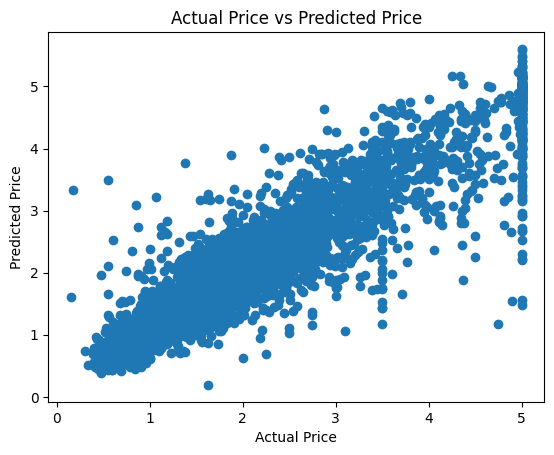

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()